# Exploratory Data Analysis

This part aims at exploring and visualizing the data. Some subparts are here by pure curisoty to explore and may not be useful to the final winner prediction model.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
data = pd.read_csv('data/processed_data.csv', parse_dates=True)
data.head()

,date,home_team,away_team,home_team_wins,home_team_losses,away_team_wins,away_team_losses,home_wining_percentage,away_wining_percentage,home_avg_score,...,away_avg_ortg,home_avg_drtg,away_avg_drtg,home_avg_nrtg,away_avg_nrtg,home_team_budget,home_team_salary_mass,away_team_budget,away_team_salary_mass,home_team_win
0,2019-12-23,Châlons-Reims,Le Portel,6,9,3,12,0.400000,0.200000,82.333333,...,101.318795,108.849069,115.081726,1.296078,-13.762931,4253000,1406000,3948000,1250000,True
1,2019-12-14,Chalon/Saône,Le Portel,3,10,3,10,0.230769,0.230769,73.692308,...,102.322540,116.183755,114.869922,-12.756160,-12.547383,5452000,1736000,3948000,1250000,True
2,2020-01-18,Boulazac,Le Portel,5,13,3,15,0.277778,0.166667,82.944444,...,103.154736,113.418723,116.025048,-4.453786,-12.870312,3794000,1509000,3948000,1250000,True
3,2019-10-26,Cholet,Le Portel,3,2,1,4,0.600000,0.200000,81.800000,...,100.495657,104.030839,108.179698,5.939569,-7.684041,4601000,1365000,3948000,1250000,True
4,2020-01-25,Bourg-en-Bresse,Le Portel,12,7,3,16,0.631579,0.157895,83.263158,...,102.665591,110.782337,115.269924,2.377065,-12.604333,5354000,1702000,3948000,1250000,True


In [4]:
data.shape

(222, 62)

In [5]:
pd.options.display.max_columns = None # To have the description of all columns
data.describe()

,home_team_wins,home_team_losses,away_team_wins,away_team_losses,home_wining_percentage,away_wining_percentage,home_avg_score,away_avg_score,home_avg_qt_1_pts,away_avg_qt_1_pts,home_avg_qt_2_pts,away_avg_qt_2_pts,home_avg_qt_3_pts,away_avg_qt_3_pts,home_avg_qt_4_pts,away_avg_qt_4_pts,home_avg_ast,away_avg_ast,home_avg_drbd,away_avg_drbd,home_avg_orbd,away_avg_orbd,home_avg_2pm,away_avg_2pm,home_avg_2pa,away_avg_2pa,home_avg_3pm,away_avg_3pm,home_avg_3pa,away_avg_3pa,home_avg_ftm,away_avg_ftm,home_avg_fta,away_avg_fta,home_avg_blk,away_avg_blk,home_avg_stl,away_avg_stl,home_avg_tov,away_avg_tov,home_avg_pf,away_avg_pf,home_avg_pfd,away_avg_pfd,home_avg_possessions,away_avg_possessions,home_avg_pace,away_avg_pace,home_avg_ortg,away_avg_ortg,home_avg_drtg,away_avg_drtg,home_avg_nrtg,away_avg_nrtg,home_team_budget,home_team_salary_mass,away_team_budget,away_team_salary_mass
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,2.220000e+02,2.220000e+02,2.220000e+02
mean,6.608108,6.265766,6.698198,6.144144,0.495395,0.521577,81.262687,81.740461,20.647735,20.699878,19.874000,20.049589,19.939884,20.102244,20.215196,20.248333,18.022073,18.264163,24.387452,24.375152,10.010057,9.978237,20.742107,20.777474,39.159239,39.150452,8.428916,8.508835,22.744487,22.850836,14.491727,14.660540,19.448924,19.633169,2.358541,2.342538,6.870659,6.954284,13.311189,13.175781,20.920461,20.784996,20.332284,20.501369,73.762384,73.837426,73.267511,73.295872,110.202418,110.730312,110.264274,109.987401,-0.061856,0.742911,5.926802e+06,1.940523e+06,5.860365e+06,1.923550e+06
std,5.304700,4.543067,5.022474,4.634802,0.268838,0.261174,5.105792,5.052964,2.010826,2.025904,2.302555,1.994828,1.966500,1.912460,2.134868,2.278602,2.496726,2.548175,2.002007,1.961854,1.729937,1.839406,2.597169,2.437943,3.258261,3.038533,1.644547,1.521987,3.132663,2.887781,2.332126,2.497658,3.176583,3.221079,0.677946,0.712327,1.484573,1.576087,1.781628,1.699959,1.566938,1.310540,1.791662,1.758523,2.724810,2.919439,2.291016,2.405730,6.079974,5.752247,6.111340,5.948509,9.590368,8.956248,2.024092e+06,6.792320e+05,1.919764e+06,6.560664e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,62.000000,12.000000,15.000000,8.000000,11.000000,15.500000,12.000000,13.000000,11.000000,7.000000,9.000000,20.250000,19.000000,4.500000,3.000000,13.000000,12.000000,27.000000,32.625000,1.000000,3.500000,12.000000,15.000000,8.000000,6.000000,10.000000,9.000000,0.500000,0.000000,2.500000,2.000000,8.000000,5.000000,15.000000,15.500000,15.000000,16.000000,66.520000,66.680000,66.520000,66.680000,75.447570,85.777532,75.447570,85.777532,-35.229513,-19.137517,3.752000e+06,1.250000e+06,3.752000e+06,1.250000e+06
25%,3.000000,2.000000,3.000000,2.000000,0.315789,0.333333,78.957692,79.800000,19.340909,19.402273,18.941176,19.116667,18.763736,18.946429,19.000000,19.152574,16.549107,16.681818,23.090278,23.178054,9.000000,8.889583,19.382353,19.270652,37.000000,36.793750,7.350000,7.400000,20.000000,20.186364,12.925000,13.050658,17.605042,17.934783,1.870924,1.804545,5.789286,5.750000,12.145604,12.097689,20.285714,20.139773,19.186364,19.508333,71.888571,71.974464,71.746536,71.728500,107.209764,107.803262,106.299380,106.097351,-6.765105,-5.782385,4.504000e+06,1.509000e+06,4.504000e+06,1.509000e+06
50%,5.000000,5.500000,6.000000,5.000000,0.416667,0.444444,81.866071,81.922705,20.165158,20.218254,20.081169,20.195238,20.125000,20.281746,20.267857,20.613872,18.245238,18.414

Any null value:

In [6]:
data.columns[data.isna().any()]

Index([], dtype='object')

Shape of the data:

In [7]:
data.shape

(222, 62)

In [8]:
222*58

12876

We are left with **222 observations** for and **62 features** (58 if we exclude the game date, teams names and target variable), which is **12876 data points**.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    222 non-null    object 
 1   home_team               222 non-null    object 
 2   away_team               222 non-null    object 
 3   home_team_wins          222 non-null    int64  
 4   home_team_losses        222 non-null    int64  
 5   away_team_wins          222 non-null    int64  
 6   away_team_losses        222 non-null    int64  
 7   home_wining_percentage  222 non-null    float64
 8   away_wining_percentage  222 non-null    float64
 9   home_avg_score          222 non-null    float64
 10  away_avg_score          222 non-null    float64
 11  home_avg_qt_1_pts       222 non-null    float64
 12  away_avg_qt_1_pts       222 non-null    float64
 13  home_avg_qt_2_pts       222 non-null    float64
 14  away_avg_qt_2_pts       222 non-null    fl

As we have 2 teams changing every year, we don't want to have a model that is team dependent, thus we won't include it in the model.  

In [10]:
data = data.drop(columns=['home_team', 'away_team'])

## Data distribution


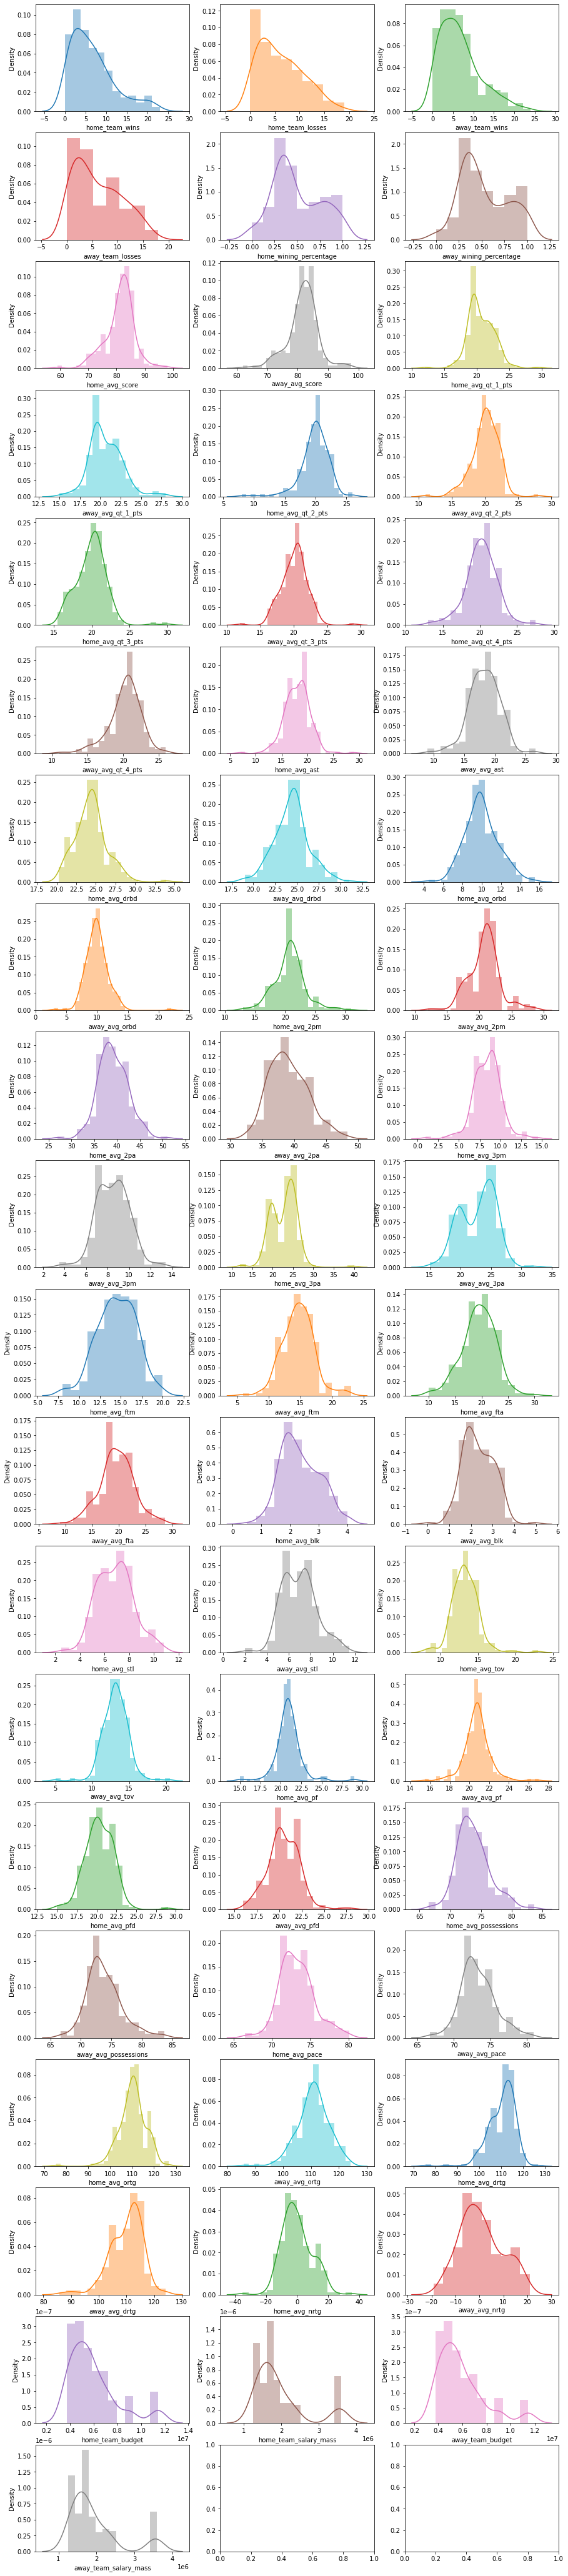

In [48]:
numerical_features = data.select_dtypes(['int64', 'float64'])
nb_numerical_features = numerical_features.shape[1]
colors = sns.color_palette(n_colors=nb_numerical_features).as_hex()

with warnings.catch_warnings(record=True):
    f, axes = plt.subplots(nb_numerical_features//3 + 1, 3, figsize=(15, 75))
    for idx in range(0, nb_numerical_features):
         sns.distplot(numerical_features.iloc[:,idx] , color=colors[idx], ax=axes[idx//3, idx%3])

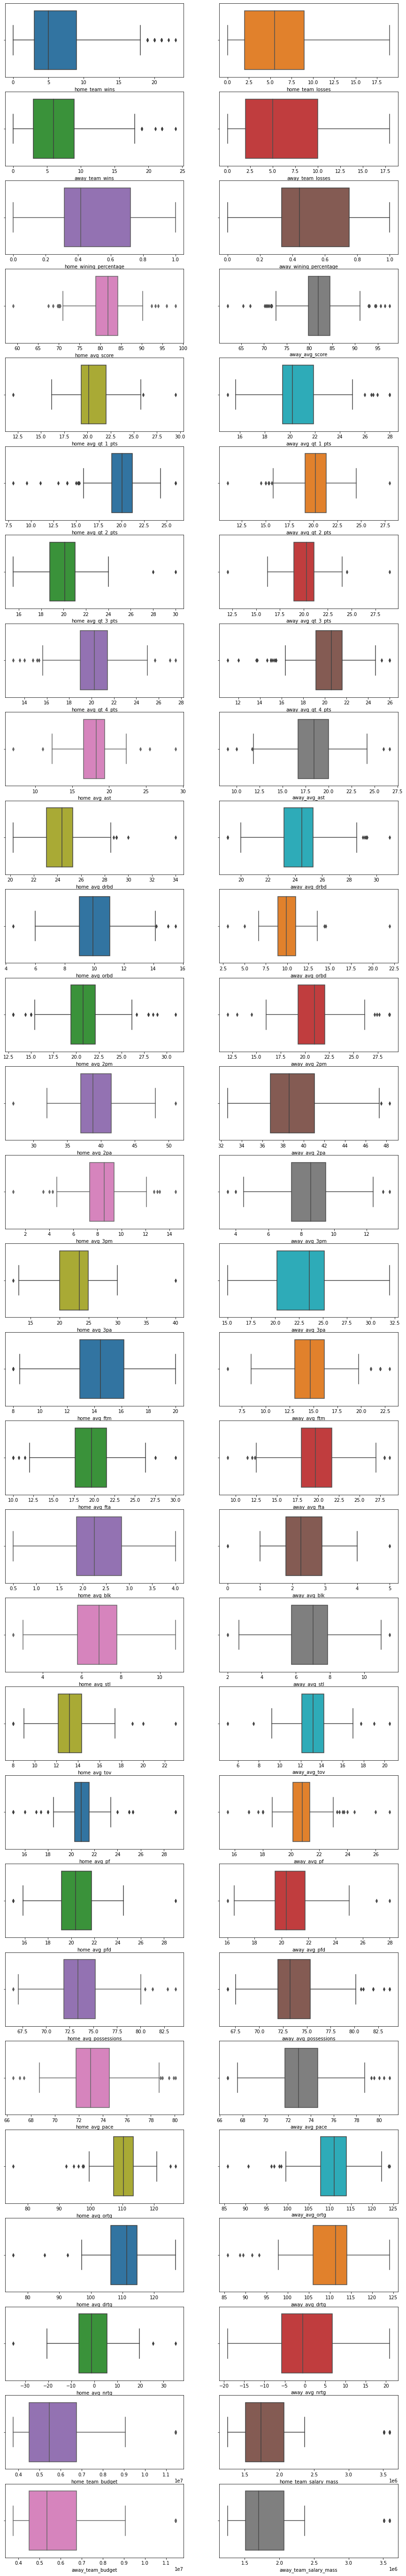

In [95]:
with warnings.catch_warnings(record=True):
    f, axes = plt.subplots(nb_numerical_features//2, 2, figsize=(15, 100))
    for idx in range(0, nb_numerical_features):
        sns.boxplot(x=numerical_features.iloc[:, idx], orient="h", ax=axes[idx//2, idx%2], color=colors[idx])

There are a lot f outliers in many features, in particular:
- personal fouls
- 4th quarter teams average points (probably teams with more bench)

Win and loss count doesn't make sense and is dependent of the date/season advancement. Wining percentage is much more relevant. Those features can be dropped.

In [100]:
data = data.drop(columns=['home_team_wins', 'away_team_wins', 'home_team_losses', 'away_team_losses'])

In [101]:
data.shape

(222, 56)

Distribution of the target variable:

0.5945945945945946


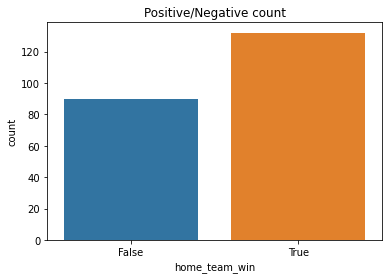

In [103]:
print(data['home_team_win'].sum()/len(data['home_team_win']))
sns.countplot(x=data['home_team_win']).set_title('Positive/Negative count');

With a $59/41$ positive/negative ratio, our dataset is **slightly unbalanced**. We can consider it is ok and won't bias our accuracy metrics (rule of thumb is $> 80\%$).

## Correlations

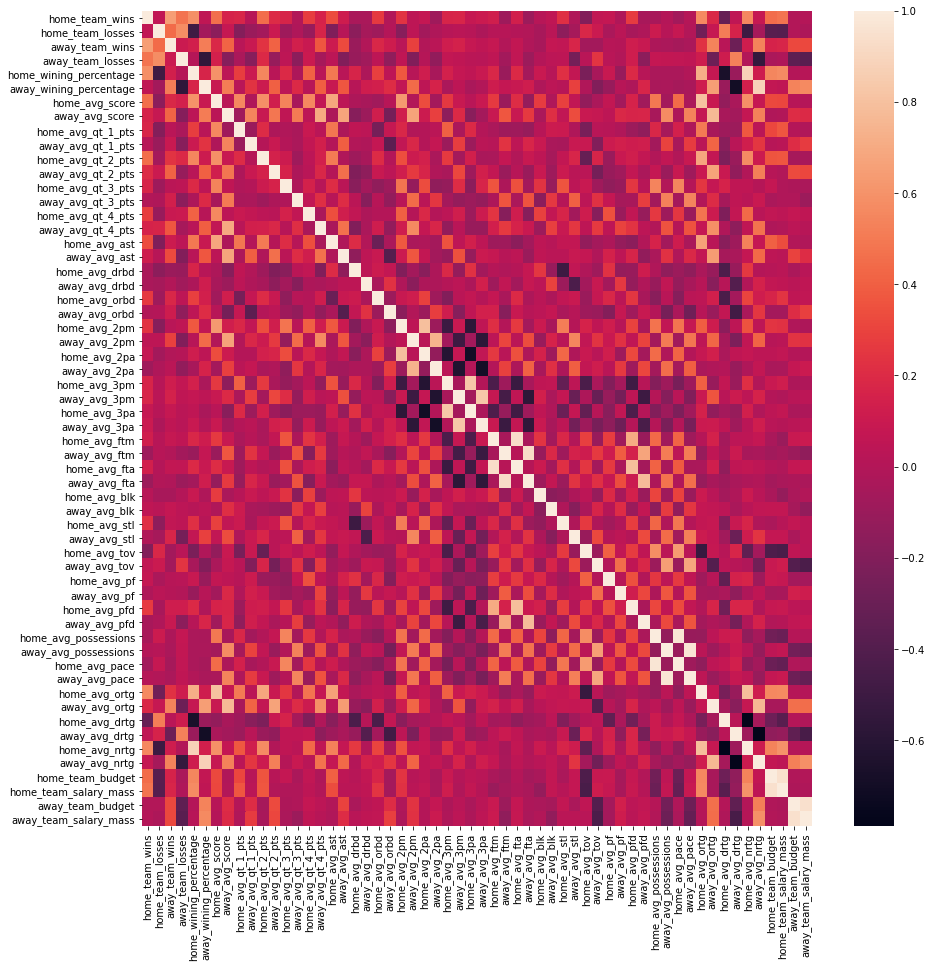

In [111]:
corr_matrix = numerical_features.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(numerical_features.corr(), ax=ax);

In [121]:
pairs = corr_matrix.unstack()
pairs = pairs[(pairs != 1) & ((pairs > 0.9) | (pairs < -0.9))]
pairs

home_avg_ftm           home_avg_fta             0.935924
away_avg_ftm           away_avg_fta             0.923835
home_avg_fta           home_avg_ftm             0.935924
away_avg_fta           away_avg_ftm             0.923835
home_avg_possessions   home_avg_pace            0.969977
away_avg_possessions   away_avg_pace            0.967392
home_avg_pace          home_avg_possessions     0.969977
away_avg_pace          away_avg_possessions     0.967392
home_team_budget       home_team_salary_mass    0.948694
home_team_salary_mass  home_team_budget         0.948694
away_team_budget       away_team_salary_mass    0.946802
away_team_salary_mass  away_team_budget         0.946802
dtype: float64

##  Principal Component Analysis
- Do we find the aggregated statistics listed during the research phase ?

## Pace analysis
- Can we see teams playing very fast ? By experience Monaco should be part of those teams as they are playing a lot of fast-breaks.

## Team statistics evolution

- Do teams' statistics evolve over team, denoting improvement in teams ?